# U.S. Medical Insurance Costs

By Paul P.<br>
This project was created with the <strong>U.S. Medical Insurance Costs</strong> [dataset](https://www.kaggle.com/mirichoi0218/insurance) <em>(insurance.csv)</em>.

## Project Scope
Questions to be answered:
1. Find out the <b>average age</b> of the patients in the dataset.
2. Analyze where a <b>majority of the individuals are from</b>.
3. Look at the different <b>costs between smokers vs. non-smokers.</b>
4. Figure out what the <b>average age is for someone who has at least one child</b> in this dataset.
5. Provide insight on <b>how Sex influences insurance costs.</b>

In [195]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Reading Dataset

First, I imported the dataset using a helper function. Since the insurance data is organized in a tabular form, I just have to call `load_list()` each time to store the corresponding data into a list. 

In [196]:
# creating variable lists
age = []
sex = []
bmi = []
children = []
smoker = []
region = []
charges = []

# creating a helper function to load the .csv dataset
def load_list(var_list, csv_file, column_title):
    with open(csv_file) as insurance_data:
        data = csv.DictReader(insurance_data)
        for row in data:
            var_list.append(row[column_title])


I'm also reading the csv into a DataFrame through the **Pandas** libary.

In [197]:
df = pd.read_csv('insurance.csv')

# Printing first 5 rows of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Each column is stored in the appropiate list so we can make our desired calculations when we aren't using **Pandas**.

In [198]:
load_list(age, 'insurance.csv', 'age')
load_list(sex, 'insurance.csv', 'sex')
load_list(bmi, 'insurance.csv', 'bmi')
load_list(children, 'insurance.csv', 'children')
load_list(smoker, 'insurance.csv', 'smoker')
load_list(region, 'insurance.csv', 'region')
load_list(charges, 'insurance.csv', 'charges')

# Analyzing The Data

### 1. Average Age
The average age patient age is calculated using `average_age()`. The function simply adds all the numerical elements and then divides it by the amount of patients in the list.

In [199]:
def average_age():
    # a variable that stores the sum of all patient ages.
    sum = 0
    # calculates the length of the list.
    length_age = len(age)


    for element in age:
        # adds the total ages into the variable 'sum'
        sum += int(element)

    # calculates the average age by dividing the total ages by the length of the list
    average_age = sum / length_age
    return "The average patient age is: " + str(round(average_age, 1)) + " years."

In [200]:
average_age()

'The average patient age is: 39.2 years.'

We can visualize the comparison of age versus charges with a scatter plot. I used the **Pandas** and **Matplotlib** **Libaries** to create this scatter plot graph.

The plot displays the costs gradually rising as the patient age increases.

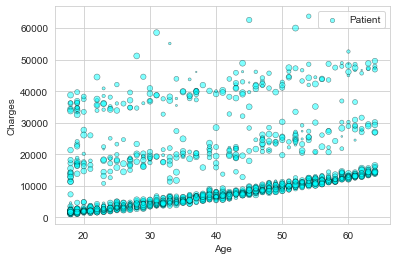

In [201]:
# create the scatterplot 
plt.scatter(df['age'], df['charges'], c='cyan', alpha=0.5, edgecolors='black', linewidths=0.5, s=(750 * np.random.rand(1338))**.55, label='Patient')

# x and y labels
plt.xlabel('Age')
plt.ylabel('Charges')

plt.legend(loc=1)

### 2. Most popular regions
The three most frequent regions in our dataset can be calculated with our `popular_regions()` function. 

In [202]:
def popular_regions():
    # create a empty list to store our regions
    unique_regions = []

    # finds every region and append it to our list
    for element in region:
        if element not in unique_regions:
            unique_regions.append(element)

    # create a empty dict to store our regions with number of occurrences
    region_occurences = {}

    # for each region in our list, assign  a key and number of occurrences
    for unique_region in unique_regions: 
        region_occurences[unique_region] = region.count(unique_region)

    # sort our dict
    sorted_regions = sorted(region_occurences, key=region_occurences.get, reverse=True)
    
    return "The most popular region is {first}. The second most popular region is {second}. The third most popular region is {third}." \
    .format(first=sorted_regions[0], second=sorted_regions[1], third=sorted_regions[2])


In [203]:
popular_regions()

'The most popular region is southeast. The second most popular region is southwest. The third most popular region is northwest.'

Here I used **Matplotlib** and **Pandas** again to create a bar chart to visualize the regions.

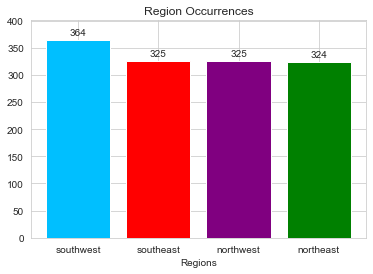

In [204]:
# Counting the total values in each region
r_occurrences=df['region'].value_counts()

# Returns the unique regions 
r_names = df['region'].unique()

# create the bar chart
bar = plt.bar(r_names, r_occurrences, color=['deepskyblue', 'red','purple', 'green'])

plt.title('Region Occurrences')
plt.xlabel('Regions')
plt.bar_label(bar, padding=3)
plt.margins(y=0.1)


## 3. Smokers versus non-smokers cost

To calculate the average cost for smokers and non-smokers, and the difference between both groups, I will use the **Pandas Library.** It's easier to use **Pandas** to find aggregate information than using functions like in the previous examples.

Here I am seperating the smoker data from the DataFrame.

In [205]:
df_smokers = df[['smoker', 'charges']]

# print first 5 rows
df_smokers.head()

,smoker,charges
0,yes,16884.92400
1,no,1725.55230
2,no,4449.46200
3,no,21984.47061
4,no,3866.85520


Now I can use `agg()` from **pandas** to retrieve a summary of the data.

In [206]:
agg_smokers = df_smokers.groupby('smoker').agg({'charges': ['mean', 'min', 'max']}).reset_index()

agg_smokers.columns = ['smoker', 'mean', 'min', 'max']

# print first 5 rows

agg_smokers.head()

,smoker,mean,min,max
0,no,8434.268298,1121.8739,36910.60803
1,yes,32050.231832,12829.4551,63770.42801


In [207]:
# assign non-smoker cost in the table to given variable
non_smoker_avg = agg_smokers.iloc[0,1]

# assignment smoker cost in the table to given variable
smoker_avg = agg_smokers.iloc[1,1]

# print our results
print('The average cost for a smoker is ${smoker}'.format(smoker=smoker_avg.round(1)))
print('The average cost for non-smokers is ${non_smoker}'.format(non_smoker=non_smoker_avg.round(1)))

The average cost for a smoker is $32050.2
The average cost for non-smokers is $8434.3


Now that we have the information we need, we can use a simple bar plot from **Matplotlib** to display the charges between Smokers and Non-Smokers.

[Text(0, 5, '32050.2'), Text(0, 5, '8434.27')]

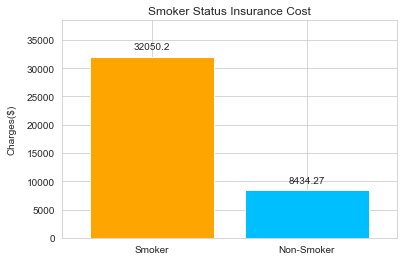

In [208]:
labels = ['Smoker','Non-Smoker']
smoker_values = [smoker_avg, non_smoker_avg]

smoker_bar = plt.bar(labels, smoker_values, color=['orange', 'deepskyblue'])
plt.title('Smoker Status Insurance Cost')
plt.ylabel('Charges($)', labelpad=10)
plt.margins(x=0.1, y=0.2)
plt.bar_label(smoker_bar, padding= 5)


## 4. Average age with someone with atleast one child

To calculate the average age for someone with at least one child, I will again use the **Pandas Library**. We will simply use `mean()` from **pandas** for someone who has greater than 0 children.

And we will also use the **Seaborn** and **Matplotlib** libraries for visualizations.

In [209]:
# select our desired subset
df_parents = df[['age', 'children']]

# only include people who have at least 1 child
df_parents = df_parents[df_parents.children > 0]

# print first 5 rows
df_parents.head()


,age,children
1,18,1
2,28,3
6,46,1
7,37,3
8,37,2


In [210]:
# assign the average age of someone to given variable 
average_age = df_parents.age.mean()

# print results
print('The average age for someone with at least one child is {age}'.format(age = round(average_age, 1)))

The average age for someone with at least one child is 39.8


Text(24.780104712041883, 85, 'Mean Age:39.8')

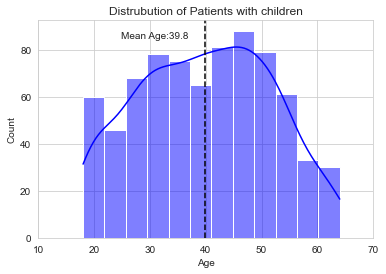

In [220]:
# only include the age column from the dataframe 
ages_with_atleast_one = df_parents['age']

# create seaborn histogram
sns.histplot(data=ages_with_atleast_one, kde=True, color='b').set(title='Distrubution of Patients with children', xlabel='Age')

# create dashed mean line
plt.axvline(ages_with_atleast_one.mean(), linestyle='--', color='black')
plt.text(average_age - 15, 85, 'Mean Age:' + str(round(average_age, 1)), size='medium')

plt.xlim(10,70)

## 5. Influence of Sex on insurance costs

To provide insight on the influece of Sex on insurance costs, we will again use **pandas**, **seaborn**, and **matplotlib**. 

In [224]:
# using aggregate() to calculate the mean, minimum, and maximum costs
cost_per_sex = df.groupby('sex').agg({'charges': ['mean', 'min', 'max']})

# rename our colums to represent our table
cost_per_sex.columns = ['cost_mean', 'cost_min', 'cost_max']

# reset index to default indexing
cost_per_sex = cost_per_sex.reset_index()

# round dataset
sex_agg = cost_per_sex.round(2)

sex_agg.head()

,sex,cost_mean,cost_min,cost_max
0,female,12569.58,1607.51,63770.43
1,male,13956.75,1121.87,62592.87


**Seaborn** is a quick and effecient way to create visualizations from **panda** dataframes. It's easier than matplotlib in cases like these too. Here we will make a box plot directly from our main df.

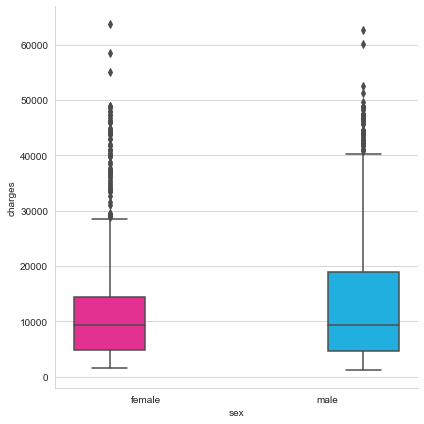

In [213]:
# color palette for the box plot
palette = {"female":"deeppink", "male":"deepskyblue"}

# creating seaborn box plot
sns.catplot(x='sex', y='charges', data=df, hue='sex', height=6, kind='box', palette=palette)

Displaying which Sex has a higher medical insurance cost.

In [215]:
# only our average male cost
mean_m = sex_agg.iloc[1,1]

# only our average female cost
mean_f = sex_agg.iloc[0,1]

# difference of Sex
sex_diff = mean_m-mean_f

# print results
print('The average cost of medical insurance is ${} higher for males than females.'.format(sex_diff))

The average cost of medical insurance is $1387.17 higher for males than females.


The distinct influence of age is again present in this scatter plot. While there isn't much visual influence of sex like in the box plot, there is notable correlation in the rise of costs due to BMI.

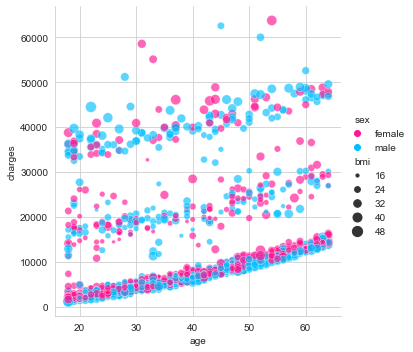

In [226]:
# color palette for scatterplot
palette = {"female":"deeppink", "male":"deepskyblue"}

sns.relplot(x='age', y='charges', data=df, size='bmi', sizes=(10,120), hue='sex', alpha=.65, height=5, palette=palette)